In [1]:
import pandas as pd

In [2]:
final = pd.read_csv('hoho_final.csv',index_col = 'Unnamed: 0.1')
final =final.drop('Unnamed: 0', axis =1)
final.head()

,0,1,2,senti
0,한옥집 마당에 앉아서 기다리다가 자리가 나서 안으로 들어가서 맛있는 식사를 했어요\...,"I was waiting in the yard of the hanok house, ...",11.0,pos
1,항상 대기가 많아보여서 엄두를 못 냈는데 생각보다 웨이팅도 빨리 빠지고 회전율이 빨...,It always looked like there was a lot of waiti...,11.0,pos
2,"혜화 주민이라 자주갔는데,혜화에서 약속잡기 좋은 식당이라고 생각합니다. 생각보다 마...",I went there often because I'm a resident of H...,27.0,pos
3,주중인데도 웨이팅있을만큼 인기있는 곳 매장 직원들이 친절하고 음식 맛도 좋아용!! ...,The store staff is so popular that they can wa...,7.0,pos
4,혜화에 방문한다면 젤 추천하고 싶은 밥집이에여! 친절하고 예쁘고 오픈시간부터 우르르...,"If you visit Hyehwa, it's a restaurant that I ...",11.0,pos


In [3]:
final['senti'].unique()

array(['pos', 'neg', 'neutral'], dtype=object)

# 긍부정 bar차트 

In [11]:
sentiment = final['senti'].value_counts()
sentiment

pos        1265
neutral     151
neg          39
Name: senti, dtype: int64

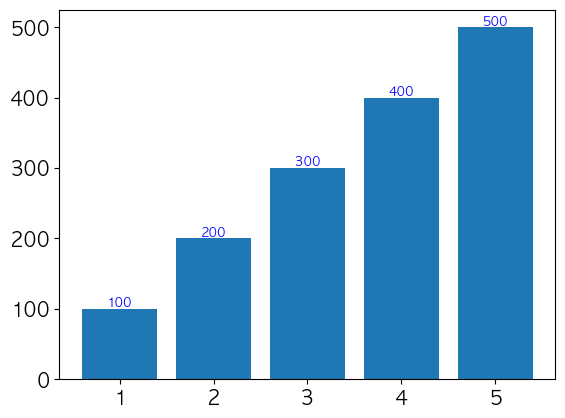

In [19]:
x = [1,2,3,4,5]
y = [100,200,300,400,500]

import matplotlib.pyplot as plt

plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

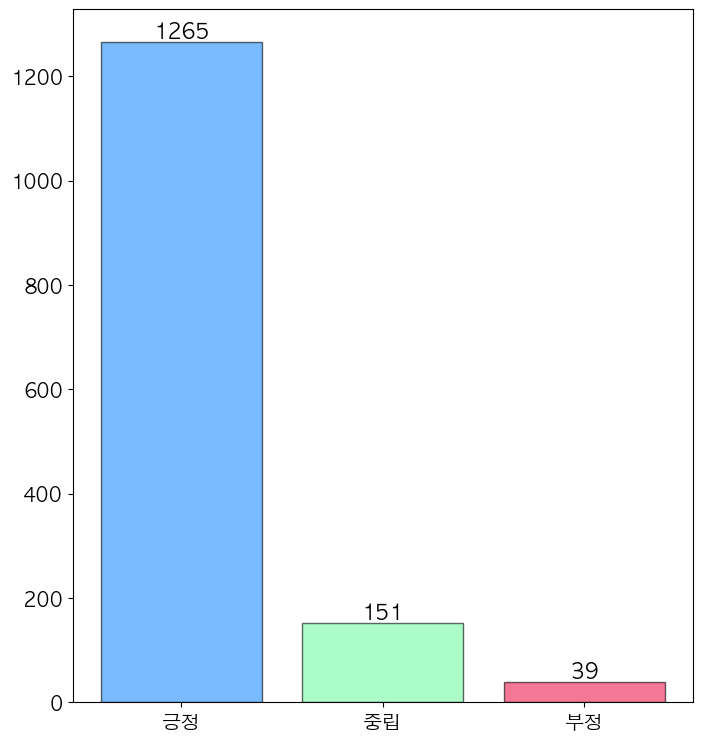

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic',size=14) 

x = ['긍정', '중립', '부정']
y = [sentiment[0], sentiment[1], sentiment[2]]

colors = ['dodgerblue','#75fba4', '#ef1c51']

plt.figure(figsize=(8,9))
plt.bar(x, y, color=colors,alpha = 0.6,edgecolor='black')

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')

    
plt.xticks(x, senti)
plt.savefig("긍부정그래프1.jpg")
plt.show()

# pos데이터

In [8]:
pos_data = final[final['senti']=='pos']
pos_data.shape

(1265, 4)

# 자주 쓰이는 명사 추출

In [9]:
!pip install wordcloud

In [10]:
!pip install konlpy

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

# 정규식표현 

In [12]:
pos_data['0'] = pos_data['0'].str.replace('[^가-힣]', ' ', regex = True)
pos_data['0']

/var/folders/9c/5jbh2nqs0z9fjpbb82h63_6r0000gn/T/ipykernel_7216/2593843423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_data['0'] = pos_data['0'].str.replace('[^가-힣]', ' ', regex = True)


0       한옥집 마당에 앉아서 기다리다가 자리가 나서 안으로 들어가서 맛있는 식사를 했어요 ...
1       항상 대기가 많아보여서 엄두를 못 냈는데 생각보다 웨이팅도 빨리 빠지고 회전율이 빨...
2       혜화 주민이라 자주갔는데 혜화에서 약속잡기 좋은 식당이라고 생각합니다  생각보다 마...
3       주중인데도 웨이팅있을만큼 인기있는 곳 매장 직원들이 친절하고 음식 맛도 좋아용   ...
4       혜화에 방문한다면 젤 추천하고 싶은 밥집이에여  친절하고 예쁘고 오픈시간부터 우르르...
                              ...                        
1449    연어올라와져있는덮밥이 참 맛있었어요  웨이팅은 계속있더라구요  일요일 열한시반경에 ...
1450                               분을 기다려서 먹을만큼 너무 맛있다   
1451                                           비싸지만 맛은 인정
1452    스키야끼가 괜찮아요 전체적으로 짠맛이 있어요 그래서 일식느낌 좋아하시는분들 좋고요 ...
1453                                             괜찮은 일식당 
Name: 0, Length: 1265, dtype: object

# 형태소 분석기 꼬꼬마(Kkma) 를 사용한 명사 추출 

In [13]:
import konlpy
kkma = konlpy.tag.Kkma() 

nouns = pos_data['0'].apply(kkma.nouns)
nouns

  
java.lang.NullPointerException
	at org.snu.ids.ha.ma.MorphemeAnalyzer.postProcess(MorphemeAnalyzer.java:258)
	at org.snu.ids.ha.index.KeywordExtractor.extractKeyword(KeywordExtractor.java:127)
	at kr.lucypark.kkma.KkmaInterface.extractNoun(Unknown Source)
  
java.lang.NullPointerException
	at org.snu.ids.ha.ma.MorphemeAnalyzer.postProcess(MorphemeAnalyzer.java:258)
	at org.snu.ids.ha.index.KeywordExtractor.extractKeyword(KeywordExtractor.java:127)
	at kr.lucypark.kkma.KkmaInterface.extractNoun(Unknown Source)
  
java.lang.NullPointerException
	at org.snu.ids.ha.ma.MorphemeAnalyzer.postProcess(MorphemeAnalyzer.java:258)
	at org.snu.ids.ha.index.KeywordExtractor.extractKeyword(KeywordExtractor.java:127)
	at kr.lucypark.kkma.KkmaInterface.extractNoun(Unknown Source)


0       [한옥집, 마당, 자리, 안, 식사, 분, 친절, 음식, 홀, 조금, 울림, 사람,...
1       [대기, 엄두, 생각, 웨이팅, 회전율, 양, 부족, 편, 음식, 맛, 특별, 날,...
2       [혜화, 주민, 약속, 약속잡기, 잡기, 식당, 생각, 곳, 친구, 가격, 가격대비...
3       [주중, 웨이팅, 만큼, 인기, 곳, 매장, 직원, 친절, 음식, 맛, 돈까스, 히...
4       [혜화, 방문, 젤, 추천, 밥집, 여, 친절, 오픈, 오픈시간, 시간, 손님, 대...
                              ...                        
1449                   [연어, 덮밥, 웨이팅, 일요일, 열한, 열한시반경, 시반경]
1450                                              [분, 만큼]
1451                                              [맛, 인정]
1452        [스키, 끼, 전체적, 짠맛, 일식, 일식느낌, 느낌, 분, 한국식, 일수도있아]
1453                                                [일식당]
Name: 0, Length: 1265, dtype: object

In [14]:
nouns = nouns.explode()
nouns

0         한옥집
0          마당
0          자리
0           안
0          식사
        ...  
1452       느낌
1452        분
1452      한국식
1452    일수도있아
1453      일식당
Name: 0, Length: 9151, dtype: object

In [15]:
#2글자 이상 추출
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
0,한옥집,3.0
0,마당,2.0
0,자리,2.0
0,식사,2.0
0,친절,2.0
...,...,...
1452,일식느낌,4.0
1452,느낌,2.0
1452,한국식,3.0
1452,일수도있아,5.0


In [16]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
1069,음식,320
598,분위기,227
1433,친절,180
965,예약,180
768,시간,141
...,...,...
909,엄수,1
910,엄지,1
911,업무,1
912,업소,1


In [17]:
#100번 이상 등장한 명사
df_word[df_word['count']>100]

,word,count
1069,음식,320
598,분위기,227
1433,친절,180
965,예약,180
768,시간,141
1353,직원,132
1052,웨이팅,104
805,식사,102


In [18]:
# 당연한 단어 제거
df_word = df_word.iloc[3:, :]
df_word.head(10)

,word,count
965,예약,180
768,시간,141
1353,직원,132
1052,웨이팅,104
805,식사,102
525,방문,87
456,메뉴,74
1356,직원분,71
940,연어,69
277,대기,62


In [19]:
#1번 등장한 키워드 제거 

idx = df_word[df_word['count'] == 1].index
df_word = df_word.drop(idx)
df_word

,word,count
965,예약,180
768,시간,141
1353,직원,132
1052,웨이팅,104
805,식사,102
...,...,...
18,가성,2
19,가성비가,2
506,바람,2
255,단독방,2


In [20]:
df_word.tail(10)

,word,count
275,당일날,2
297,대신,2
24,가옥,2
288,대로,2
11,가량,2
18,가성,2
19,가성비가,2
506,바람,2
255,단독방,2
282,대기자,2


# 워드클라우드

In [21]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'예약': 180,
 '시간': 141,
 '직원': 132,
 '웨이팅': 104,
 '식사': 102,
 '방문': 87,
 '메뉴': 74,
 '직원분': 71,
 '연어': 69,
 '대기': 62,
 '가격': 51,
 '한옥': 50,
 '정식': 50,
 '식당': 49,
 '만족': 49,
 '파스타': 48,
 '다음': 47,
 '이용': 46,
 '공간': 44,
 '양이': 42,
 '인테리어': 41,
 '주문': 40,
 '서비스': 36,
 '생각': 36,
 '단체': 35,
 '느낌': 32,
 '덮밥': 31,
 '안내': 30,
 '정도': 30,
 '대학로': 28,
 '모임': 28,
 '최고': 26,
 '추천': 26,
 '기분': 24,
 '감사': 23,
 '사람': 23,
 '명란': 22,
 '자리': 22,
 '손님': 21,
 '친구': 20,
 '단체룸': 20,
 '단독': 20,
 '스테이크': 19,
 '재방문': 19,
 '완전': 19,
 '맛집': 18,
 '프라이빗': 18,
 '제한': 18,
 '가족': 18,
 '네이버': 18,
 '가능': 18,
 '아이': 17,
 '의사': 17,
 '오픈': 17,
 '스키': 16,
 '연어덮밥': 16,
 '튀김': 16,
 '처음': 15,
 '주말': 15,
 '일본': 15,
 '돈까스': 15,
 '가게': 15,
 '이용시간': 14,
 '점심': 14,
 '동이': 14,
 '특별': 14,
 '강추': 14,
 '장소': 14,
 '평일': 13,
 '하나': 13,
 '음식맛': 13,
 '만큼': 13,
 '대비': 13,
 '전체적': 13,
 '기대': 13,
 '매장': 13,
 '혜화': 12,
 '여유': 12,
 '저녁': 12,
 '히레카츠': 12,
 '고기': 11,
 '새우': 11,
 '테이블': 11,
 '양도': 11,
 '오일': 11,
 '분리': 11,
 '이상': 11,
 '행복': 11,
 '덕

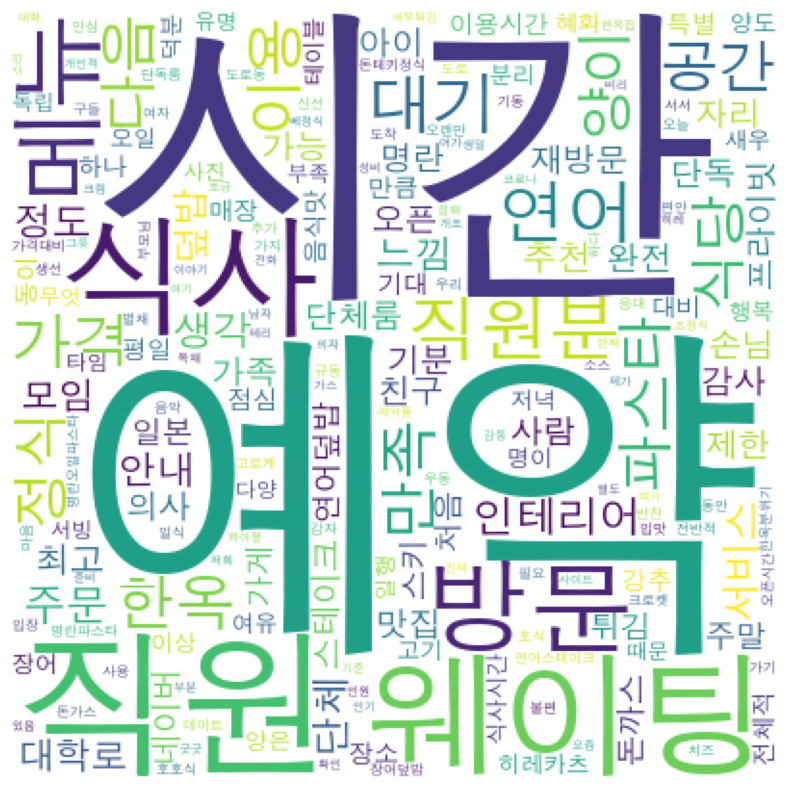

In [22]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드') # 파일 저장

In [29]:
import PIL

icon = PIL.Image.open('thumb-up-removebg-preview.png')

img = PIL.Image.new('RGB', icon.size, (1000,1000,1000))
img.paste(icon, icon)
img = np.array(img)

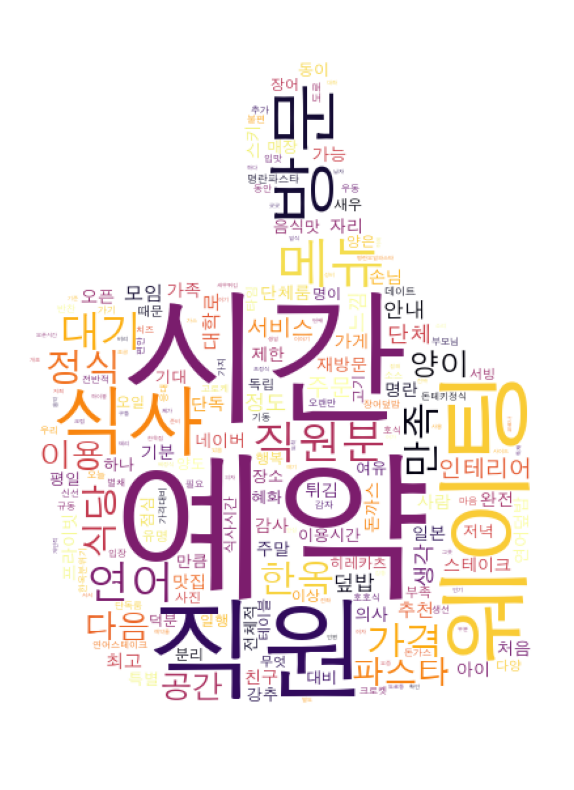

In [30]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white', mask=img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드_엄지업') # 파일 저장

# neg데이터

In [65]:
neg_data = final[final['senti']=='neg']
neg_data.shape

(39, 4)

# 자주 쓰이는 명사 추출

In [66]:
neg_data['0'] = neg_data['0'].str.replace('[^가-힣]', ' ', regex = True)
neg_data['0']

/var/folders/9c/5jbh2nqs0z9fjpbb82h63_6r0000gn/T/ipykernel_7216/700296181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_data['0'] = neg_data['0'].str.replace('[^가-힣]', ' ', regex = True)


26      다른 곳과는 다르게 웨이팅 할 때 명단 작성도 없이 그냥 외워서 하시길래 그런가보다...
108           맛있게먹었는데      쫌 아쉬운건  연어스테이크가 소스찍어먹기엔 짭짤    
191     돈가스가 좀 눅눅해서 좀 실망스러웠어요  식사도 끝나기가 무섭게 나와야하고 재방문은...
209     여자 두명이서 메뉴  개를 주문했어요 스키야키정식  히레카츠정식  우니파스타 근데 ...
222     대학로 공연 보러 갈때마다 무얼 먹지 고민였는데 그 고민을 한방에 해결해준 호호식당...
268                                 직원들이 불친절하고 서비스가 엉망입니다
303     기대했던 것 보다는 많은 아쉬움이 있네요 하이볼도 산토리가 입고되지 않아서 짐빔을 ...
353        인근 정돈 돈까스에 비하면 살짝 아쉽지만 맛있게먹었습니다  명란파스타는 조금 짰어요
423     물컵이 세척이 안되어  끈적끈적 손에 달라 붙기에 계산하며 이야기 했더니주인 같은 ...
436                             일요일 점심식사  시간 제약은 좀 그렇네요  
485                         사진 맛집  음  수급 부족으로 연어가 포장이 안 됨
510      가격에 비해 음식이 너무 부실하다  일본식 가정식이라기엔 너무 심하다 맛도 잘 모르겠다
567     음식 맛은 괜찮은데 양이 정말 너무 적어요 그만큼 대기하고 먹을 정도 아닌듯요 대신...
604     의자가 부러져 있어 교체하고 싶었는데 안돼서 불편하고 당황스러웠어요  음신은 조금 ...
642     식당이 비좁다  음식이 전반적으로 짜다  흠  우리동네 시장면가 돈까스와비교해봤을때...
650     우선 음식은 괜찮았습니다   들어가면 어떻게 어디서 기다려야 한다는 표시 없고 안에...
681     예전에 몇신분 동안 줄서서 먹었던 시절의 그 맛이 아니여서 아쉬움이 많았어요    ...
682     명란 파스타

# 형태소 분석기 꼬꼬마(Kkma) 를 사용한 명사 추출 

In [67]:
import konlpy
kkma = konlpy.tag.Kkma() 

nouns = neg_data['0'].apply(kkma.nouns)
nouns

26      [곳, 웨이팅, 때, 명단, 작성, 앞, 팀, 분, 순서, 나중, 오신, 수하, 다...
108                             [연어, 연어스테이크, 스테이크, 소스, 엔]
191                  [돈가스, 실망, 식, 식사도, 사도, 재, 재방문, 방문, 거]
209     [여자, 명이, 명이서, 서, 메뉴, 개, 주문, 스키, 키, 키정식, 정식, 히,...
222     [대학로, 공연, 때, 무, 무얼, 얼, 고민, 한방, 해결, 호, 호호식, 호식,...
268                                    [직원, 불친절, 서비스, 엉망]
303     [기대, 아쉬움, 하이볼, 산토리, 짐, 짐빔, 빔, 사용, 점도, 매장, 내, 모...
353                         [인근, 정돈, 돈까스, 명란, 명란파스타, 파스타]
423     [물, 물컵, 컵, 세척, 손, 계산, 이야기, 주인, 남자, 둥, 장사, 문제, 표정]
436                           [일요일, 점심, 점심식사, 식사, 시간, 제약]
485             [사진, 맛, 맛집, 집, 음, 수급, 부족, 연, 연어가, 어가, 포장]
510                           [가격, 음식, 부실, 일본식, 정식, 기, 맛]
567     [음식, 맛, 양이, 대기, 정도, 듯, 듯요, 요, 대신, 주문, 착석, 후, 전...
604                    [의자, 교체, 불편, 당황, 음신, 편, 일식, 본연, 맛]
642     [식당, 음식, 전반적, 흠, 우리, 동네, 시, 시장면, 장면, 돈까스, 비교, ...
650     [음식, 어디, 표시, 안, 서버, 서버분, 분, 답변, 태도, 표정, 불친절, 번...
681     [예전, 신분, 동안, 줄, 줄서서, 서서, 시절, 맛, 여, 아쉬움, 성게, 성게...
682           

In [68]:
nouns = nouns.explode()
nouns

26        곳
26      웨이팅
26        때
26       명단
26       작성
       ... 
1442      점
1442     예약
1442    예약석
1442      석
1442     시간
Name: 0, Length: 467, dtype: object

In [69]:
#2글자 이상 추출
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
26,웨이팅,3.0
26,명단,2.0
26,작성,2.0
26,순서,2.0
26,나중,2.0
...,...,...
1442,아쉬움,3.0
1442,아쉬움점,4.0
1442,예약,2.0
1442,예약석,3.0


In [70]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
162,음식,9
117,시간,6
230,파스타,6
0,가격,5
202,주문,5
...,...,...
97,서서,1
99,설명,1
101,성게알,1
102,성게알파스타,1


In [71]:
#100번 이상 등장한 명사
df_word[df_word['count']>100]

,word,count


In [72]:
# 당연한 단어 제거
df_word = df_word.iloc[3:, :]
df_word.head(10)

,word,count
0,가격,5
202,주문,5
58,명란,4
72,방문,4
210,직원,4
124,식사,4
138,양이,4
123,식당,3
40,돈까스,3
59,명란파스타,3


In [73]:
#1번 등장한 키워드 제거 

idx = df_word[df_word['count'] == 1].index
df_word = df_word.drop(idx)
df_word

,word,count
0,가격,5
202,주문,5
58,명란,4
72,방문,4
210,직원,4
124,식사,4
138,양이,4
123,식당,3
40,돈까스,3
59,명란파스타,3


In [74]:
df_word.tail(10)

,word,count
90,사진,2
100,성게,2
92,생각,2
179,입장,2
194,정도,2
28,단독,2
233,표정,2
6,걱정,2
252,확인,2
32,대기,2


# 워드클라우드

In [75]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'가격': 5,
 '주문': 5,
 '명란': 4,
 '방문': 4,
 '직원': 4,
 '식사': 4,
 '양이': 4,
 '식당': 3,
 '돈까스': 3,
 '명란파스타': 3,
 '정식': 3,
 '아쉬움': 3,
 '불친절': 3,
 '자리': 3,
 '재방문': 3,
 '일행': 2,
 '전화': 2,
 '맛집': 2,
 '메뉴': 2,
 '웨이팅': 2,
 '예전': 2,
 '연어': 2,
 '의사': 2,
 '손님': 2,
 '본인': 2,
 '부족': 2,
 '서울': 2,
 '예약': 2,
 '분위기': 2,
 '이용': 2,
 '불편': 2,
 '오므라이스': 2,
 '사진': 2,
 '성게': 2,
 '생각': 2,
 '입장': 2,
 '정도': 2,
 '단독': 2,
 '표정': 2,
 '걱정': 2,
 '확인': 2,
 '대기': 2}

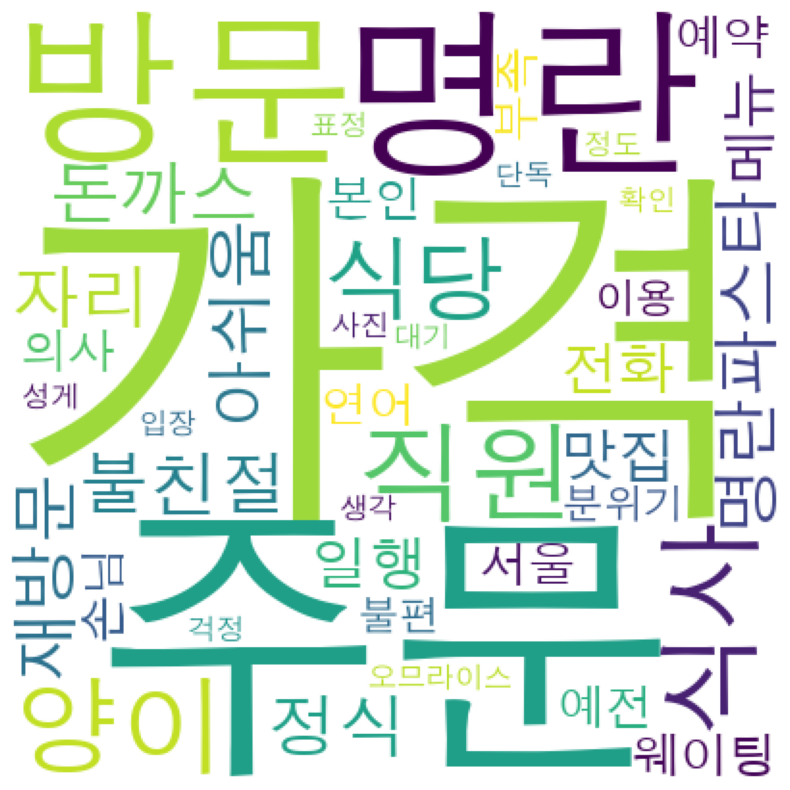

In [76]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드') # 파일 저장

In [77]:
# 워드클라우드 더 예쁘게 만들기

In [78]:
from PIL import *

icon = PIL.Image.open('thumb-down-removebg-preview.png')

img = PIL.Image.new('RGB', icon.size, (1000,1000,1000))
img.paste(icon, icon)
img = np.array(img)

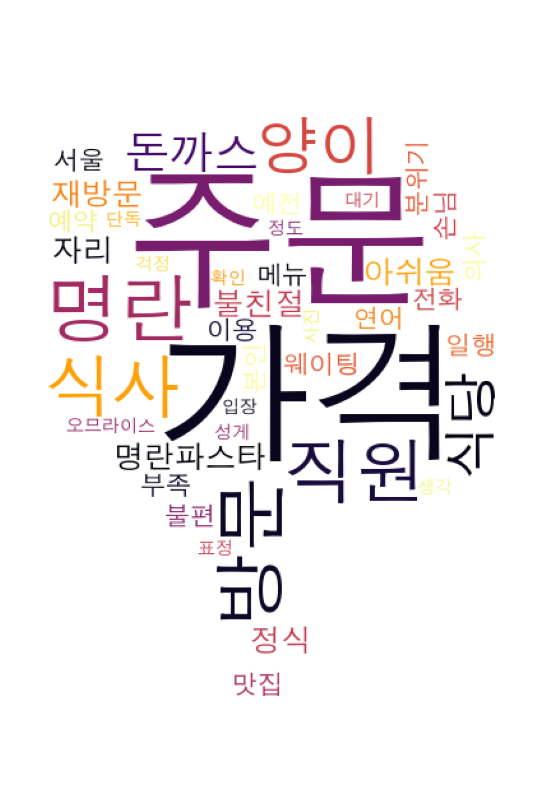

In [79]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white', mask=img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드_엄지다운') # 파일 저장

# neutral 데이터

In [80]:
neutral_data = final[final['senti']=='neutral']
neutral_data.shape

(151, 4)

# 자주 쓰이는 명사 추출

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

# 정규식표현 

In [99]:
neutral_data['0'] = neutral_data['0'].str.replace('[^가-힣]', ' ', regex = True)
neutral_data['0']

/var/folders/9c/5jbh2nqs0z9fjpbb82h63_6r0000gn/T/ipykernel_7216/1047623500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_data['0'] = neutral_data['0'].str.replace('[^가-힣]', ' ', regex = True)


31      추운 곳에서 벌벌 떨다가 들어갔어요  둘이서 메뉴 두 개를 시켰는데  혼자 먹을 수...
36                                마싯었어요      뷴 만에 먹고 나와쒀요
53      사케동을 시켜먹었는데 제 갠적으로는 가격대가 조금 있다고 생각이 들지만 연어자체는 ...
80      우니 파스타 쫀맛이에요     이용시간  시간인데  엄청 부족하다는 생각은 안들었고...
104                                            히레 꼭 드세요  
                              ...                        
1438                                   웨이팅해야하는 것만 빼면 백점  
1439                                               양이 작아요
1446                                                     
1448                                     대기가 늘 있으니 미리 가세요
1454                                                     
Name: 0, Length: 151, dtype: object

# 형태소 분석기 꼬꼬마(Kkma) 를 사용한 명사 추출 

In [100]:
import konlpy
kkma = konlpy.tag.Kkma() 

nouns = neutral_data['0'].apply(kkma.nouns)
nouns

 
java.lang.NullPointerException
 
java.lang.NullPointerException
  
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
     
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
  
java.lang.NullPointerException
 
java.lang.NullPointerException
   
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
  
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
 
java.lang.NullPointerException
  
java.lang.NullPointerException


31      [곳, 둘, 메뉴, 개, 혼자, 수, 양, 비쥬얼, 맛, 옆, 돈, 돈가스집, 가스...
36                                           [마싯었어, 뷴, 만]
53      [사, 동, 제, 적, 가격, 가격대, 대, 생각, 연어, 연어자체, 자체, 느낌,...
80                  [파스타, 맛, 이용, 이용시간, 시간, 부족, 생각, 대신, 양]
104                                            [히, 히레, 레]
                              ...                        
1438                                      [웨이팅, 백, 백점, 점]
1439                                                 [양이]
1446                                                   []
1448                                             [대기, 가세]
1454                                                   []
Name: 0, Length: 151, dtype: object

In [101]:
nouns = nouns.explode()
nouns

31        곳
31        둘
31       메뉴
31        개
31       혼자
       ... 
1439     양이
1446    NaN
1448     대기
1448     가세
1454    NaN
Name: 0, Length: 590, dtype: object

In [102]:
#2글자 이상 추출
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
31,메뉴,2.0
31,혼자,2.0
31,비쥬얼,3.0
31,돈가스집,4.0
31,가스,2.0
...,...,...
1438,웨이팅,3.0
1438,백점,2.0
1439,양이,2.0
1448,대기,2.0


In [103]:
df_word = df_word.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_word

,word,count
157,웨이팅,14
158,음식,11
150,예약,10
124,시간,8
0,가격,7
...,...,...
90,베드,1
91,베리,1
92,베리코,1
93,베정식,1


In [104]:
#100번 이상 등장한 명사
df_word[df_word['count']>100]

,word,count


In [105]:
# 당연한 단어 제거
df_word = df_word.iloc[3:, :]
df_word.head(10)

,word,count
124,시간,8
0,가격,7
195,정도,7
128,식사,5
46,대기,5
162,이용,5
111,생각,4
202,주문,4
198,제한,4
217,특별,4


In [106]:
#1번 등장한 키워드 제거 

idx = df_word[df_word['count'] == 1].index
df_word = df_word.drop(idx)
df_word

,word,count
124,시간,8
0,가격,7
195,정도,7
128,식사,5
46,대기,5
162,이용,5
111,생각,4
202,주문,4
198,제한,4
217,특별,4


In [107]:
df_word.tail(10)

,word,count
25,공간,2
232,혼자,2
142,여기,2
29,기동,2
3,가능,2
30,기분,2
2,가격대비,2
34,남자,2
18,개조,2
220,품절,2


# 워드클라우드

In [108]:
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'시간': 8,
 '가격': 7,
 '정도': 7,
 '식사': 5,
 '대기': 5,
 '이용': 5,
 '생각': 4,
 '주문': 4,
 '제한': 4,
 '특별': 4,
 '파스타': 4,
 '양이': 4,
 '정식': 4,
 '분위기': 4,
 '식당': 4,
 '메뉴': 4,
 '한옥': 4,
 '대학로': 3,
 '다음': 3,
 '히레': 3,
 '가세': 3,
 '처음': 3,
 '쏘쏘': 3,
 '이용시간': 2,
 '대학로맛': 2,
 '연어': 2,
 '조금': 2,
 '대비': 2,
 '벌레': 2,
 '방문': 2,
 '직원': 2,
 '장소': 2,
 '점심': 2,
 '보통': 2,
 '사람': 2,
 '친절': 2,
 '필수': 2,
 '공간': 2,
 '혼자': 2,
 '여기': 2,
 '기동': 2,
 '가능': 2,
 '기분': 2,
 '가격대비': 2,
 '남자': 2,
 '개조': 2,
 '품절': 2}

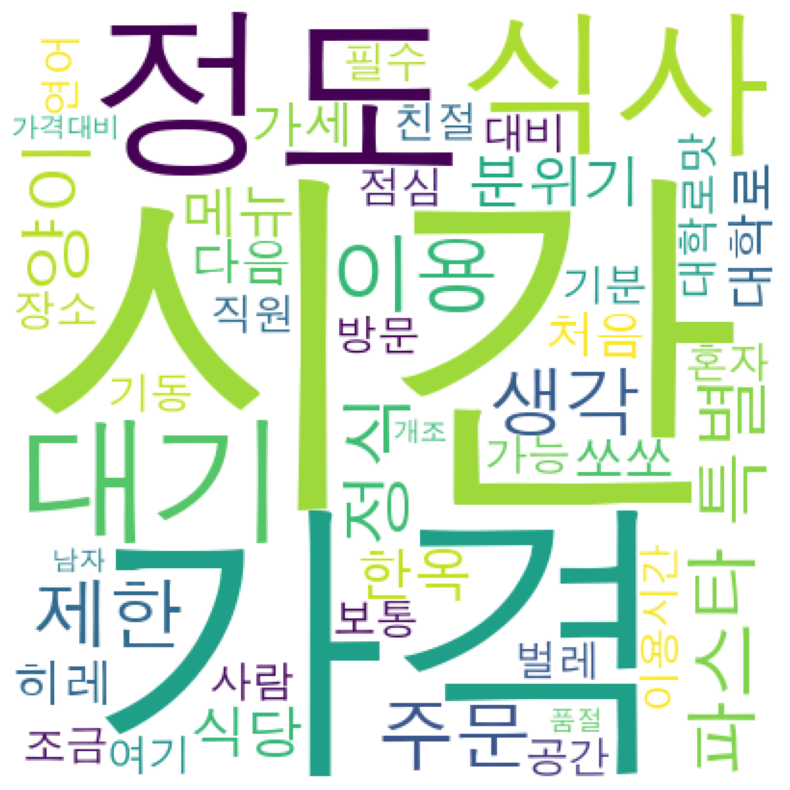

In [109]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드') # 파일 저장

In [110]:
# 워드클라우드 더 예쁘게 만들기

In [111]:
from PIL import *

icon = PIL.Image.open('thumb-and-removebg-preview.png')

img = PIL.Image.new('RGB', icon.size, (700,700,700))
img.paste(icon, icon)
img = np.array(img)

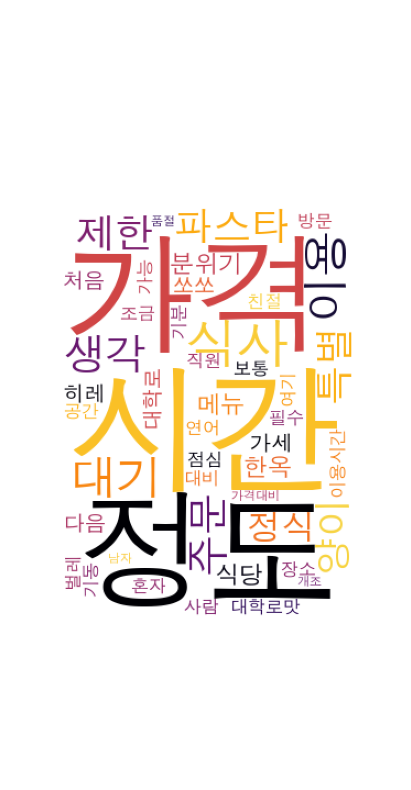

In [112]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white', mask=img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
plt.savefig('호호식당_워드클라우드_중립') # 파일 저장